# SNaCK Quickstart: Let's build an embedding on Yummly-10k!

In [ ]:
# Download and install Snack
!conda install -y -c https://conda.anaconda.org/gcr snack


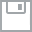
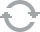
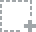
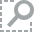
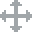
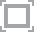
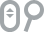
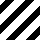
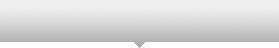
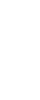
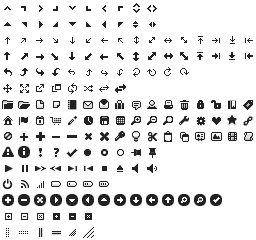
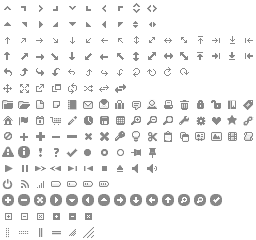
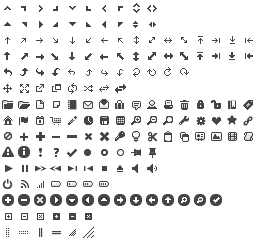
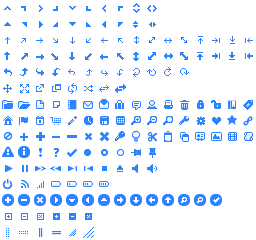
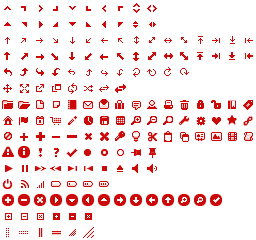
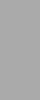
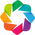
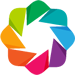

In [1]:
from bokeh.plotting import output_notebook, figure, show, hplot
from bokeh_image_explore import explore_embedding
import simplejson
import snack
import bz2
import numpy as np
output_notebook()

# Load the data
with bz2.BZ2File("food-10k/dataset.json.bz2") as f:
    dset = simplejson.load(f)
ftrs = np.load("food-10k/features.npy").astype('float')
uuid_map = {uuid: i for i,uuid in enumerate(dset['image_uuids'])}
urls = [dset['uuid_to_url'][id] for id in dset['image_uuids']]
triplets = []
with bz2.BZ2File("food-10k/all-triplets.txt.bz2") as f:
    for line in f.readlines():
        (a,b,c) = line.replace("\n","").split(" ")
        triplets.append( (uuid_map[a], uuid_map[b], uuid_map[c]) )
triplets = np.array(triplets)

Build an embedding.
===================

Try playing with the SNaCK [parameters](http://nbviewer.ipython.org/github/cornelltech/snack/blob/master/Examples.ipynb) to get different embeddings!

This typically takes 200 seconds. Only hit "Run" once!
-----------------------------------------

In [2]:
X = snack.snack_embed(
    # The deep-learned features
    X_np = ftrs,
    contrib_cost_tsne = 500.0,
    # The expert constraints
    triplets = triplets,
    contrib_cost_triplets = 0.05,
    theta = 0.5,
    verbose = True,
)

Using no_dims = 2, perplexity = 30.000000, and theta = 0.500000
Computing input similarities...
Learning embedding...
Iter 0
Iter 50
Iter 100
Iter 150
Iter 200
Iter 250


Display the embedding
======================
Zoom and pan with the mouse wheel. Images appear when you zoom.
---------------------

In [3]:
show(explore_embedding(X, urls, title="Yummly 10k"))